In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris_data['data']
y = iris_data['target']
target_names = iris_data['target_names']
feature_names = iris_data['feature_names']

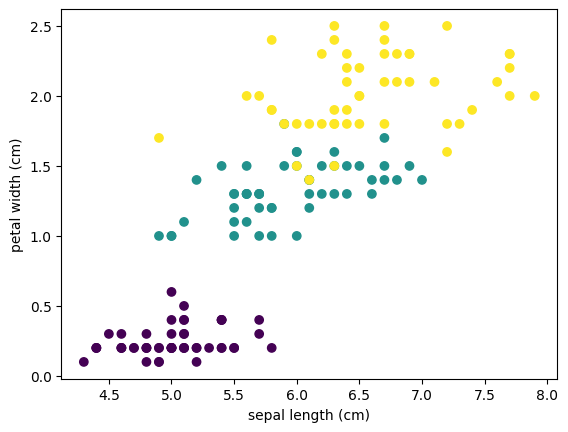

In [ ]:
plt.scatter(X[:,0], X[:,-1], c = y)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

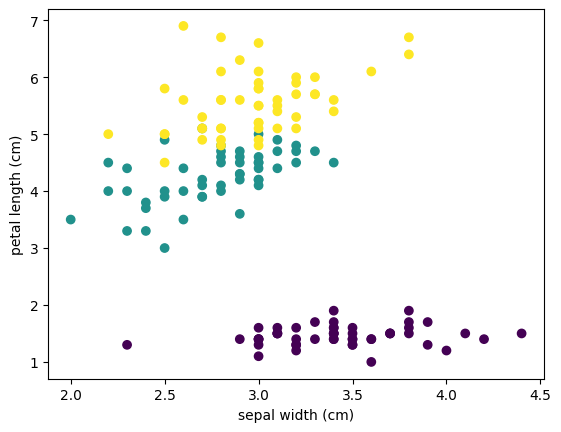

In [ ]:
plt.scatter(X[:,1], X[:,-2], c = y)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal length (cm)")
plt.show()

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
# build a model
from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [ ]:
y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

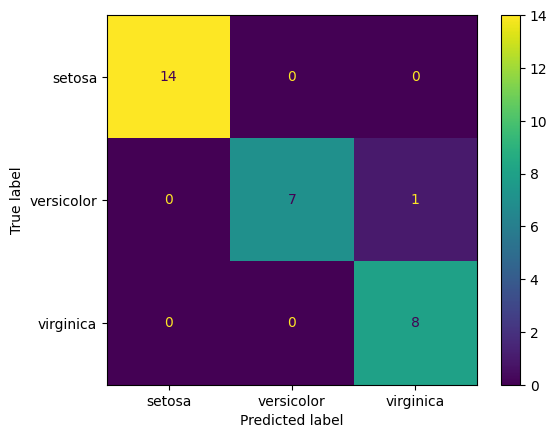

In [ ]:
cm_disp = ConfusionMatrixDisplay(cm, display_labels = target_names)
cm_disp.plot()

In [ ]:
# hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [1, 2, 3],
    'gamma' : ['scale', 'auto']
}

In [ ]:
grid_clf = GridSearchCV(
    SVC(),
    param_grid = param_grid, scoring = 'accuracy',
    cv = 5
)

In [ ]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid_clf.cv_results_)[['param_degree', 'param_gamma', 'param_kernel', 'mean_test_score']]

,param_degree,param_gamma,param_kernel,mean_test_score
0,1,scale,linear,0.975000
1,1,scale,poly,0.958333
2,1,scale,rbf,0.966667
3,1,auto,linear,0.975000
4,1,auto,poly,0.975000
5,1,auto,rbf,0.975000
6,2,scale,linear,0.975000
7,2,scale,poly,0.975000
8,2,scale,rbf,0.966667
9,2,auto,linear,0.975000


In [ ]:
grid_clf.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_clf.best_score_

0.975

In [ ]:
new_clf = SVC(degree = 1, gamma= 'scale', kernel = 'linear')

In [ ]:
new_clf.fit(X_train, y_train)

SVC(degree=1, kernel='linear')

In [ ]:
new_y_pred = new_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, new_y_pred)

1.0

In [ ]:
cm = confusion_matrix(y_test, new_y_pred)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
val_score = cross_val_score(SVC(), X, y, scoring = 'accuracy', cv = 10)
val_score

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [ ]:
val_score.mean()

0.9733333333333334